# Map:

In [ ]:
!pip install pyspark

In [ ]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

empleados = [
    ("Ana", "Ventas", 48000),
    ("Carlos", "Marketing", 54000),
    ("Luis", "Finanzas", 60000),
    ("Marta", "Ventas", 52000),
    ("Sofía", "Finanzas", 58000)
]

rdd_empleados = sc.parallelize(empleados)

rdd_empleados_mensual = rdd_empleados.map(lambda x: (x[0], x[1], x[2], x[2] / 12))

resultado = rdd_empleados_mensual.collect()
print("Empleados con salario mensual:")
for empleado in resultado:
    print(empleado)


Empleados con salario mensual:
('Ana', 'Ventas', 48000, 4000.0)
('Carlos', 'Marketing', 54000, 4500.0)
('Luis', 'Finanzas', 60000, 5000.0)
('Marta', 'Ventas', 52000, 4333.333333333333)
('Sofía', 'Finanzas', 58000, 4833.333333333333)


# Filter:


In [ ]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

empleados = [
    ("Ana", "Ventas", 48000),
    ("Carlos", "Marketing", 54000),
    ("Luis", "Finanzas", 60000),
    ("Marta", "Ventas", 52000),
    ("Sofía", "Finanzas", 58000),
    ("Juan", "IT", 45000)
]

rdd_empleados = sc.parallelize(empleados)

rdd_empleados_filtrados = rdd_empleados.filter(lambda x: x[2] > 50000)

resultado = rdd_empleados_filtrados.collect()
print("Empleados con salario anual superior a 50,000:")
for empleado in resultado:
    print(empleado)


Empleados con salario anual superior a 50,000:
('Carlos', 'Marketing', 54000)
('Luis', 'Finanzas', 60000)
('Marta', 'Ventas', 52000)
('Sofía', 'Finanzas', 58000)


# FlatMap

In [ ]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

oraciones = [
    "Aprendiendo todos los dias",
    "Spark es una herramienta poderosa para big data",
    "Navidad esta cada vez mas cerca"
]

rdd_oraciones = sc.parallelize(oraciones)

rdd_palabras = rdd_oraciones.flatMap(lambda oracion: oracion.split(" "))

resultado = rdd_palabras.collect()
print("Lista de palabras en las oraciones:")
for palabra in resultado:
    print(palabra)


Lista de palabras en las oraciones:
Aprendiendo
todos
los
dias
Spark
es
una
herramienta
poderosa
para
big
data
Navidad
esta
cada
vez
ams
cerca


# Union:

In [ ]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

curso_a = [("Ana", "Matemáticas"), ("Luis", "Historia"), ("Sofía", "Química")]
curso_b = [("Carlos", "Matemáticas"), ("Marta", "Física"), ("Ana", "Biología")]

rdd_curso_a = sc.parallelize(curso_a)
rdd_curso_b = sc.parallelize(curso_b)

rdd_union = rdd_curso_a.union(rdd_curso_b)

resultado = rdd_union.collect()
print("Lista combinada de estudiantes de ambos cursos:")
for estudiante in resultado:
    print(estudiante)


Lista combinada de estudiantes de ambos cursos:
('Ana', 'Matemáticas')
('Luis', 'Historia')
('Sofía', 'Química')
('Carlos', 'Matemáticas')
('Marta', 'Física')
('Ana', 'Biología')


# Intersection:

In [ ]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

tienda_a = [("Laptop", 1200), ("Tablet", 300), ("Celular", 500)]
tienda_b = [("Celular", 500), ("Televisión", 800), ("Tablet", 300)]

rdd_tienda_a = sc.parallelize(tienda_a)
rdd_tienda_b = sc.parallelize(tienda_b)

rdd_interseccion = rdd_tienda_a.intersection(rdd_tienda_b)

resultado = rdd_interseccion.collect()
print("Productos comunes en ambas tiendas:")
for producto in resultado:
    print(producto)


Productos comunes en ambas tiendas:
('Tablet', 300)
('Celular', 500)


# Distinc:

In [ ]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

productos = [
    "Laptop", "Tablet", "Sofá", "Celular", "Tablet", "Celular", "Laptop", "Cámara"
]

rdd_productos = sc.parallelize(productos)

rdd_unicos = rdd_productos.distinct()

resultado = rdd_unicos.collect()
print("Lista de productos únicos:")
for producto in resultado:
    print(producto)


Lista de productos únicos:
Tablet
Sofá
Celular
Laptop
Cámara


# GroupByKey

In [ ]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

ventas = [
    ("Electrónica", 300),
    ("Electrónica", 450),
    ("Ropa", 120),
    ("Ropa", 80),
    ("Hogar", 150),
    ("Electrónica", 250),
    ("Hogar", 200)
]

rdd_ventas = sc.parallelize(ventas)

rdd_ventas_agrupadas = rdd_ventas.groupByKey()

resultado = rdd_ventas_agrupadas.collect()
print("Montos de ventas agrupados por departamento:")
for departamento, montos in resultado:
    print(departamento, list(montos))


Montos de ventas agrupados por departamento:
Electrónica [300, 450, 250]
Hogar [150, 200]
Ropa [120, 80]


# reduceByKey

In [ ]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

ventas = [
    ("Electrónica", 300),
    ("Electrónica", 450),
    ("Ropa", 120),
    ("Ropa", 80),
    ("Hogar", 150),
    ("Electrónica", 250),
    ("Hogar", 200)
]

rdd_ventas = sc.parallelize(ventas)

rdd_totales = rdd_ventas.reduceByKey(lambda x, y: x + y)

resultado = rdd_totales.collect()
print("Total de ventas por departamento:")
for departamento, total in resultado:
    print(departamento, total)


Total de ventas por departamento:
Electrónica 1000
Hogar 350
Ropa 200


# SortByKey

In [ ]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

empleados = [
    (48000, "Ana"),
    (54000, "Carlos"),
    (60000, "Luis"),
    (52000, "Marta"),
    (58000, "Sofía"),
    (45000, "Juan")
]

rdd_empleados = sc.parallelize(empleados)

rdd_ordenados = rdd_empleados.sortByKey()

resultado = rdd_ordenados.collect()
print("Empleados ordenados por salario:")
for salario, empleado in resultado:
    print(f"{empleado}: {salario}")


Empleados ordenados por salario:
Juan: 45000
Ana: 48000
Marta: 52000
Carlos: 54000
Sofía: 58000
Luis: 60000


# Join:

In [ ]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

empleados = [
    (1, "Ana"),
    (2, "Carlos"),
    (3, "Luis"),
    (4, "Marta"),
    (5, "Sofía")
]

departamentos = [
    (1, "Ventas", 48000),
    (2, "Marketing", 54000),
    (3, "Finanzas", 60000),
    (4, "Ventas", 52000),
    (5, "Finanzas", 58000)
]

rdd_empleados = sc.parallelize(empleados)
rdd_departamentos = sc.parallelize(departamentos)

rdd_empleados_departamentos = rdd_empleados.join(rdd_departamentos)

resultado = rdd_empleados_departamentos.collect()
print("Detalles completos de empleados y sus departamentos:")
for id_empleado, info in resultado:
    nombre = info[0]
    departamento = info[1][0]
    salario = info[1][1]
    print(f"ID: {id_empleado}, Nombre: {nombre}, Departamento: {departamento}, Salario Anual: ${salario}")



Detalles completos de empleados y sus departamentos:
ID: 4, Nombre: Marta, Departamento: V, Salario Anual: $e
ID: 1, Nombre: Ana, Departamento: V, Salario Anual: $e
ID: 5, Nombre: Sofía, Departamento: F, Salario Anual: $i
ID: 2, Nombre: Carlos, Departamento: M, Salario Anual: $a
ID: 3, Nombre: Luis, Departamento: F, Salario Anual: $i


# CoGroup:

In [ ]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

empleados = [
    (1, "Ana"),
    (2, "Carlos"),
    (3, "Luis"),
    (4, "Marta"),
    (5, "Sofía")
]

proyectos = [
    (1, "Proyecto A"),
    (1, "Proyecto B"),
    (2, "Proyecto A"),
    (3, "Proyecto C"),
    (4, "Proyecto A"),
    (4, "Proyecto B"),
    (5, "Proyecto D")
]

horas_proyectos = [
    (1, 20),
    (1, 15),
    (2, 30),
    (3, 40),
    (4, 25),
    (4, 10),
    (5, 35)
]

rdd_empleados = sc.parallelize(empleados)
rdd_proyectos = sc.parallelize(proyectos)
rdd_horas = sc.parallelize(horas_proyectos)

rdd_proyectos_kv = rdd_proyectos.map(lambda x: (x[0], x[1]))
rdd_horas_kv = rdd_horas.map(lambda x: (x[0], x[1]))

rdd_empleados_proyectos_horas = rdd_proyectos_kv.cogroup(rdd_horas_kv)

rdd_resultado = rdd_empleados.join(rdd_empleados_proyectos_horas)

resultado = rdd_resultado.collect()
print("Detalles de proyectos y horas dedicadas por cada empleado:")
for id_empleado, (nombre, (proyectos, horas)) in resultado:
    proyectos = list(proyectos)
    horas = list(horas)
    print(f"ID: {id_empleado}, Nombre: {nombre}, Proyectos: {proyectos}, Horas dedicadas: {horas}")


Detalles de proyectos y horas dedicadas por cada empleado:
ID: 1, Nombre: Ana, Proyectos: ['Proyecto A', 'Proyecto B'], Horas dedicadas: [20, 15]
ID: 2, Nombre: Carlos, Proyectos: ['Proyecto A'], Horas dedicadas: [30]
ID: 3, Nombre: Luis, Proyectos: ['Proyecto C'], Horas dedicadas: [40]
ID: 4, Nombre: Marta, Proyectos: ['Proyecto A', 'Proyecto B'], Horas dedicadas: [25, 10]
ID: 5, Nombre: Sofía, Proyectos: ['Proyecto D'], Horas dedicadas: [35]


# Coalesce:

# PROPUESTA GIDGET (INTERACT)

In [ ]:
#  Específicamente, el widget deslizante interactivo (interact) permite ajustar un valor en un rango dado y observar cómo afecta al resultado en tiempo real.
from ipywidgets import interact

def multiplicar(val, data):
    resultado = [(categoria, total * val) for categoria, total in data]
    print("Resultados actualizados:", resultado)

# pasamos totales al widget
interact(lambda val: multiplicar(val, totales), val=(1, 10))


interactive(children=(IntSlider(value=5, description='val', max=10, min=1), Output()), _dom_classes=('widget-i…

<function __main__.<lambda>(val)>

# Agregamos gráficos atractivos para representar resultados.

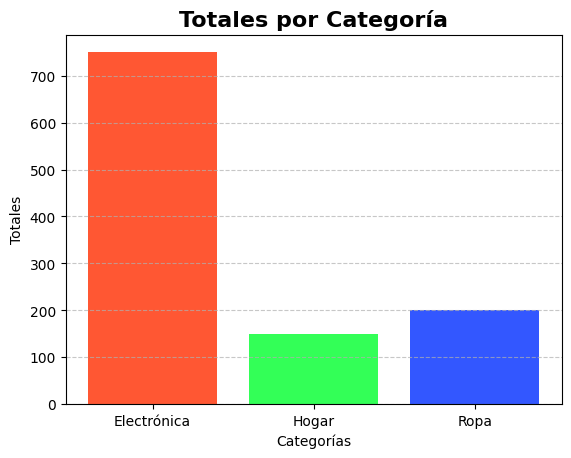

In [ ]:
import matplotlib.pyplot as plt

# preparamos datos para visualizacion
categorias, valores = zip(*totales)
plt.bar(categorias, valores, color=['#FF5733', '#33FF57', '#3357FF'])
plt.title("Totales por Categoría", fontsize=16, fontweight='bold')
plt.xlabel("Categorías")
plt.ylabel("Totales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
from ipywidgets import interact, Dropdown

# creamos una funcion para mostrar datos de una categoría específica
def mostrar_categoria(categoria):
    resultado = [total for cat, total in totales if cat == categoria]
    print(f"Resultados para {categoria}: {resultado}")

# creamos nuestro dropdown
categorias = [cat for cat, _ in totales]
dropdown = Dropdown(options=categorias, description='Categoría:')

# conectamos
interact(mostrar_categoria, categoria=dropdown)


interactive(children=(Dropdown(description='Categoría:', options=('Electrónica', 'Hogar', 'Ropa'), value='Elec…

<function __main__.mostrar_categoria(categoria)>

# Nueva sección

In [10]:
from ipywidgets import interact, Checkbox

# creamos una funcion para mostrar resultados totales a una base
def filtrar_totales(mostrar_mayores):
    if mostrar_mayores:
        resultado = [(cat, total) for cat, total in totales if total > 200]
    else:
        resultado = totales
    print("Resultados filtrados:", resultado)

# creamos el checkbox para marcar cuando querramos que nuestro valor devuelva mayor a 200 o segun las condicion que queramos agregar
checkbox = Checkbox(value=False, description='Mostrar totales mayores a 200')

# conectamos el checkbox con nuestra funcion que hemos creado
interact(filtrar_totales, mostrar_mayores=checkbox)


interactive(children=(Checkbox(value=False, description='Mostrar totales mayores a 200'), Output()), _dom_clas…

<function __main__.filtrar_totales(mostrar_mayores)>

In [11]:
from ipywidgets import Text

# Creamos una funcion para crear valores personalizados
def ingresar_valor(valor):
    try:
        val = int(valor)
        resultado = [(cat, total * val) for cat, total in totales]
        print("Resultados personalizados:", resultado)
    except ValueError:
        print("Por favor, ingresa un número válido.")

# Creamos nuestro TEXT INPUT para que el usuario ingrese el valor del numero multiplicador
text_input = Text(value='1', description='Multiplicador:')

# Cconoctamos el txt con nuestra funcion
interact(ingresar_valor, valor=text_input)


interactive(children=(Text(value='1', description='Multiplicador:'), Output()), _dom_classes=('widget-interact…

<function __main__.ingresar_valor(valor)>

# PROPUESTA INTERESANTE - Sistema Interactivo de Gestión y Visualización de Categorías con Conexión a Base de Datos"

In [14]:
# CREAMOS UNA CONEXION CON LA BD PARA AGREGAR CATEGORIAS Y QUE NOS MUESTRE UNA TABLA ANALITICA PARA VER COMO SE MANEJAN LOS RESULTADOS DE ENTRAR QUE COLOCAMOS A NUESTRAS CATEGORIAS
import sqlite3

# Conexión a la base de datos
conn = sqlite3.connect('categorias.db')
cursor = conn.cursor()

# Crear tabla si no existe
cursor.execute('''
CREATE TABLE IF NOT EXISTS categorias (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre TEXT UNIQUE,
    valor INTEGER
)
''')
conn.commit()


In [15]:
# creamos una funcion para añadir una nueva categoría y registrar en la BD
def agregar_categoria(b):
    nueva_categoria = text_input.value.strip()
    if nueva_categoria and nueva_categoria not in categorias:
        categorias[nueva_categoria] = slider_nuevo_categoria.value
        # Guardar en la base de datos
        try:
            cursor.execute('INSERT INTO categorias (nombre, valor) VALUES (?, ?)',
                           (nueva_categoria, slider_nuevo_categoria.value))
            conn.commit()
            print(f"Categoría '{nueva_categoria}' añadida a la base de datos.")
        except sqlite3.IntegrityError:
            print(f"La categoría '{nueva_categoria}' ya existe en la base de datos.")
        actualizar_grafico()


In [16]:
# cargamos datos desde la base de datos al incio
def cargar_categorias():
    cursor.execute('SELECT nombre, valor FROM categorias')
    for nombre, valor in cursor.fetchall():
        categorias[nombre] = valor

# cargamos datos inciaeles
cargar_categorias()


In [17]:
from ipywidgets import interact, Text, IntSlider, VBox, HBox, Button, Output
import matplotlib.pyplot as plt
import sqlite3
# podemos hacer la carga desde nuestra BD ( podemos hacer la conexion con una BD que ya tenemos y solo vincularla especificando que BD queremos trabajar)
# hacemos el llamdo a nuestra conexion con nuestra BD
conn = sqlite3.connect('categorias.db')
cursor = conn.cursor()

# creamos la tabla si no existe
cursor.execute('''
CREATE TABLE IF NOT EXISTS categorias (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre TEXT UNIQUE,
    valor INTEGER
)
''')
conn.commit()

# manejamos los datos iniciales
categorias = {}
output = Output()


def cargar_categorias():
    cursor.execute('SELECT nombre, valor FROM categorias')
    for nombre, valor in cursor.fetchall():
        categorias[nombre] = valor

cargar_categorias()

# Creamos una funcion para actualizar nuestro grafico que nos ayudara en el analisis
def actualizar_grafico():
    output.clear_output()
    with output:
        plt.bar(categorias.keys(), categorias.values(), color=['#FF5733', '#33FF57', '#3357FF', '#FFD700'])
        plt.title("Totales por Categoría", fontsize=16, fontweight='bold')
        plt.xlabel("Categorías")
        plt.ylabel("Totales")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# ahora una funcion def para nueva categoria
def agregar_categoria(b):
    nueva_categoria = text_input.value.strip()
    if nueva_categoria and nueva_categoria not in categorias:
        categorias[nueva_categoria] = slider_nuevo_categoria.value
        try:
            cursor.execute('INSERT INTO categorias (nombre, valor) VALUES (?, ?)',
                           (nueva_categoria, slider_nuevo_categoria.value))
            conn.commit()
            print(f"Categoría '{nueva_categoria}' añadida a la base de datos.")
        except sqlite3.IntegrityError:
            print(f"La categoría '{nueva_categoria}' ya existe en la base de datos.")
        actualizar_grafico()

# aqui decidimos crear un slider para manipular los valores iniciales de nuestras categorias a agregar
slider_nuevo_categoria = IntSlider(value=100, min=1, max=500, description='Valor Inicial:')

# creamos un txt input para mandar el nombre de nuestra categoria
text_input = Text(value='', placeholder='Nueva Categoría', description='Categoría:')

# nuestro boton para añadir
boton_agregar = Button(description="Añadir Categoría", button_style="success")
boton_agregar.on_click(agregar_categoria)

# mostramos los widgets obviamente sino de nada valdria todo lo que hemos hecho
display(HBox([text_input, slider_nuevo_categoria, boton_agregar]))
display(output)

# por ultimo hacemos el llamdo a nuestro grafico inicial
actualizar_grafico()


Output()

Categoría 'Electrohogar' añadida a la base de datos.
Categoría 'Juguetes' añadida a la base de datos.
Categoría 'ropa' añadida a la base de datos.
Categoría 'Comida' añadida a la base de datos.
Categoría 'deporte' añadida a la base de datos.


In [20]:
import pandas as pd

# Consultamos los datos y lo mostramos en un DataFrame
cursor.execute('SELECT * FROM categorias')
registros = cursor.fetchall()

df = pd.DataFrame(registros, columns=["ID", "Nombre", "Valor"])
print(df)


   ID        Nombre  Valor
0   1  Electrohogar    100
1   2      Juguetes    212
2   3          ropa     93
3   4        Comida    251
4   5       deporte    110


In [22]:
from pyspark.sql import SparkSession

# Crear la sesión de Spark
spark = SparkSession.builder \
    .appName("GestorCategorias") \
    .getOrCreate()


In [23]:
import pandas as pd

# Leer datos desde SQLite
conn = sqlite3.connect('categorias.db')
categorias_df_sqlite = pd.read_sql_query("SELECT * FROM categorias", conn)

# Convertir el DataFrame de Pandas a un DataFrame de Spark
categorias_df = spark.createDataFrame(categorias_df_sqlite)
categorias_df.show()


+---+------------+-----+
| id|      nombre|valor|
+---+------------+-----+
|  1|Electrohogar|  100|
|  2|    Juguetes|  212|
|  3|        ropa|   93|
|  4|      Comida|  251|
|  5|     deporte|  110|
+---+------------+-----+



In [24]:
def agregar_categoria(nombre, valor):
    nueva_categoria = spark.createDataFrame([{"nombre": nombre, "valor": valor}])
    global categorias_df
    categorias_df = categorias_df.union(nueva_categoria)
    categorias_df.show()


In [25]:
totales = categorias_df.groupBy("nombre").sum("valor")
totales.show()


+------------+----------+
|      nombre|sum(valor)|
+------------+----------+
|Electrohogar|       100|
|    Juguetes|       212|
|     deporte|       110|
|      Comida|       251|
|        ropa|        93|
+------------+----------+



In [26]:
ordenadas = categorias_df.orderBy(categorias_df.valor.desc())
ordenadas.show()


+---+------------+-----+
| id|      nombre|valor|
+---+------------+-----+
|  4|      Comida|  251|
|  2|    Juguetes|  212|
|  5|     deporte|  110|
|  1|Electrohogar|  100|
|  3|        ropa|   93|
+---+------------+-----+



In [33]:
from ipywidgets import Text
text_input = Text(value='1', description='Multiplicador:')

def actualizar_totales(valor):
    try:
        multiplicador = int(valor)
        totales_actualizados = totales_df.withColumn("valor_actualizado", totales_df["valor"] * multiplicador)
        totales_actualizados.show()
    except ValueError:
        print("Por favor, ingresa un número válido.")

interact(actualizar_totales, valor=text_input)


interactive(children=(Text(value='1', description='Multiplicador:'), Output()), _dom_classes=('widget-interact…

<function __main__.actualizar_totales(valor)>